In [2]:
import numpy as np
import pandas as pd
data = np.random.standard_normal((1000000,5)).round(5)

In [3]:
path = 'flash/data'
filename = path + 'numbs'
import sqlite3 as sq3
querey = 'CREATE TABLE numbers (No1 real, No2 real, No3 real,No4 real, N5 real)'
con = sq3.Connection(filename+'.db')
con.execute(querey)


In [8]:
%%time
temp = con.executemany('INSERT INTO numbers VALUES (?,?,?,?,?)', data)
con.commit()
temp = con.execute('SELECT * FROM numbers').fetchall()
print(temp[:2])
temp = 0.0

[(1.08606, -0.87566, 0.70852, 0.74937, 0.15171), (0.42302, 0.12611, 0.26531, -0.84016, 0.52146)]
CPU times: user 4.49 s, sys: 289 ms, total: 4.78 s
Wall time: 4.94 s


In [ ]:
ll$path*

-rw-r--r--@ 1 The_real_G  staff  52633600 Jun 15 08:28 flash/datanumbs.db


In [9]:
%%time
querey = 'SELECT * FROM numbers WHERE No1 > 0 AND No2 < 0'
res = np.array(con.execute(querey).fetchall()).round(3)

CPU times: user 756 ms, sys: 72.4 ms, total: 828 ms
Wall time: 874 ms


(-4.5, 0.5)

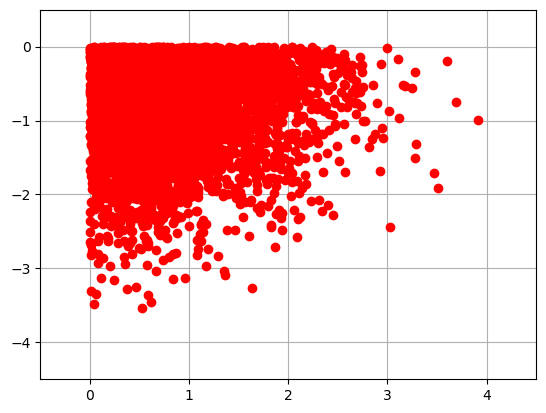

In [10]:
res = res[::100]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(res[:,0], res[:,1], 'ro')
plt.grid(True)
plt.xlim(-0.5,4.5)
plt.ylim(-4.5, 0.5)

In [11]:
import pandas.io.sql as pds
%time data = pds.read_sql('SELECT * FROM numbers', con)


CPU times: user 2.08 s, sys: 230 ms, total: 2.31 s
Wall time: 2.36 s


In [12]:
data.head()

,No1,No2,No3,No4,N5
0,1.08606,-0.87566,0.70852,0.74937,0.15171
1,0.42302,0.12611,0.26531,-0.84016,0.52146
2,0.52275,0.02882,0.19841,-0.45293,-0.61267
3,-0.53819,1.00505,-1.27829,-1.08312,1.60874
4,0.61394,0.38081,-0.56379,-0.09485,0.44877


In [13]:
%time data[(data['No1']>0)& (data['No2'] < 0)].head()

CPU times: user 22 ms, sys: 13.8 ms, total: 35.8 ms
Wall time: 29.9 ms


,No1,No2,No3,No4,N5
0,1.08606,-0.87566,0.70852,0.74937,0.15171
5,0.05090,-1.20549,-0.86876,-1.09050,-0.54791
6,0.15688,-0.91625,-0.22567,-0.10601,0.80633
10,1.02332,-0.51661,2.66758,-1.58275,-0.48489
12,1.78683,-1.56064,-0.99250,0.92298,-0.38908


In [16]:
%%time
res = data[['No1', 'No2']][((data['No1']>0.5)|(data['No1']< -0.5)) & ((data['No2']>1)|(data['No2']< -1))]

CPU times: user 30.5 ms, sys: 11.3 ms, total: 41.8 ms
Wall time: 33.8 ms


(-4.7954324999999995, 4.9603025, -4.9806475, 5.2880175)

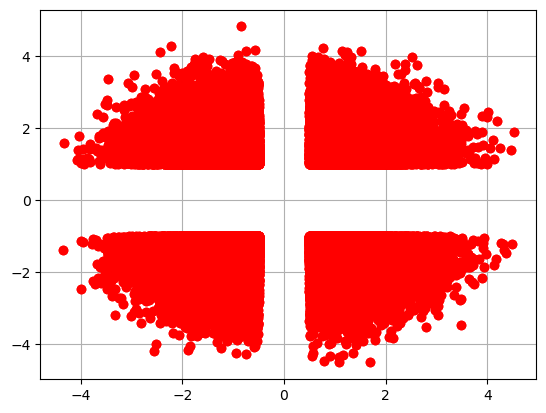

In [17]:
plt.plot(res.No1, res.No2, 'ro')
plt.grid(True)
plt.axis('tight')

In [ ]:
#h5s = pd.HDFStore(filename +  '.h5s', 'w')
%time h5s['data']= data

CPU times: user 33.6 ms, sys: 37.8 ms, total: 71.4 ms
Wall time: 123 ms


In [23]:
h5s.close()

In [28]:
%%time 
h5s = pd.HDFStore(filename + '.h5s', 'r')
temp= h5s['data']
h5s.close()

CPU times: user 22.9 ms, sys: 35.9 ms, total: 58.9 ms
Wall time: 65.9 ms


In [29]:
np.allclose(np.array(temp), np.array(data))

True

In [30]:
temp = 0.0

In [31]:
ll $path*

-rw-r--r--@ 1 The_real_G  staff  105275392 Jun 15 08:29 flash/datanumbs.db
-rw-r--r--@ 1 The_real_G  staff   96005222 Jun 15 08:57 flash/datanumbs.h5s


In [32]:
%time data.to_csv(filename+'.csv')


CPU times: user 7.24 s, sys: 298 ms, total: 7.54 s
Wall time: 7.78 s


CPU times: user 986 ms, sys: 130 ms, total: 1.12 s
Wall time: 1.15 s


array([[<Axes: title={'center': 'No1'}>, <Axes: title={'center': 'No2'}>],
       [<Axes: title={'center': 'No3'}>, <Axes: title={'center': 'No4'}>]],
      dtype=object)

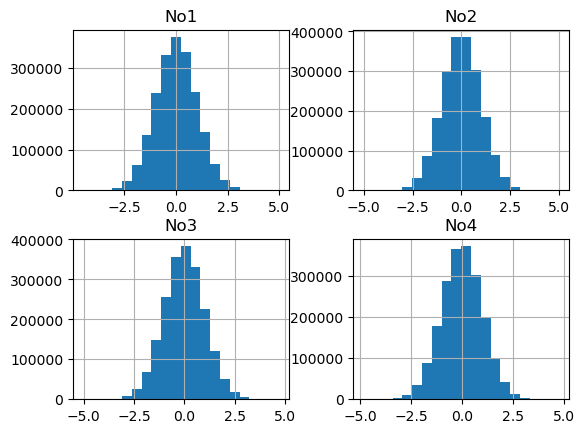

In [33]:
%%time 
pd.read_csv(filename + '.csv')[['No1', 'No2', 'No3', 'No4']].hist(bins=20)

In [40]:
data[:100000].to_excel(filename + '.xlsx', index=False)


CPU times: user 3.44 s, sys: 48.7 ms, total: 3.49 s
Wall time: 3.5 s


<Axes: >

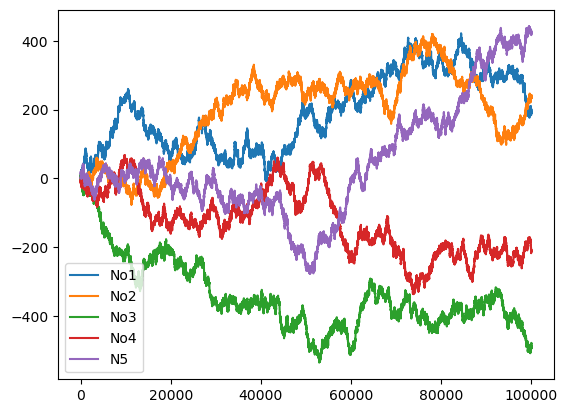

In [41]:
%time pd.read_excel(filename+'.xlsx', 'Sheet1').cumsum().plot()